In [1]:
import pandas as pd


In [ ]:
# Cargando el dataset
df = pd.read_csv("/workspaces/Practica3_GR_6/BitcoinHeistData.csv")

In [ ]:
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [ ]:
df(head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928623 entries, 0 to 928622
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    928623 non-null  object 
 1   year       928623 non-null  int64  
 2   day        928623 non-null  int64  
 3   length     928623 non-null  int64  
 4   weight     928623 non-null  float64
 5   count      928623 non-null  int64  
 6   looped     928623 non-null  int64  
 7   neighbors  928623 non-null  int64  
 8   income     928623 non-null  float64
 9   label      928623 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 70.8+ MB


In [9]:
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Generar timestamps para una semana
fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):  # 3 eventos por hora aprox
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))

In [ ]:
# Ahora creamos las visualizaciones


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

/tmp/ipykernel_3597/835052073.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_count.index, y=label_count.values, palette="viridis")


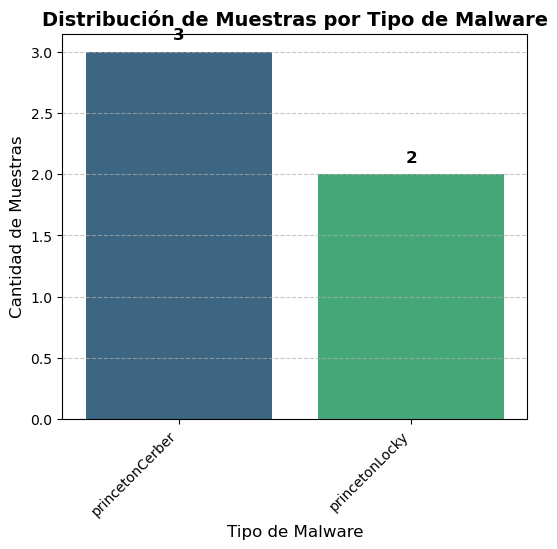

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

# Contar la cantidad de muestras por tipo de malware
label_count = df["label"].value_counts()

# Crear el gráfico de barras

sns.barplot(x=label_count.index, y=label_count.values, palette="viridis")

# Agregar los valores sobre cada barra
for i, v in enumerate(label_count.values):
    plt.text(i, v + 0.1, str(v), ha="center", fontsize=12, fontweight="bold")

# Configurar etiquetas y título
plt.xticks(rotation=45, ha="right")
plt.title("Distribución de Muestras por Tipo de Malware", fontsize=14, fontweight="bold")
plt.xlabel("Tipo de Malware", fontsize=12)
plt.ylabel("Cantidad de Muestras", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()


/tmp/ipykernel_3597/1973359083.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="year", data=df, ax=axes[0, 0], palette="coolwarm")
/tmp/ipykernel_3597/1973359083.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="weight", data=df, ax=axes[1, 1], palette="muted")


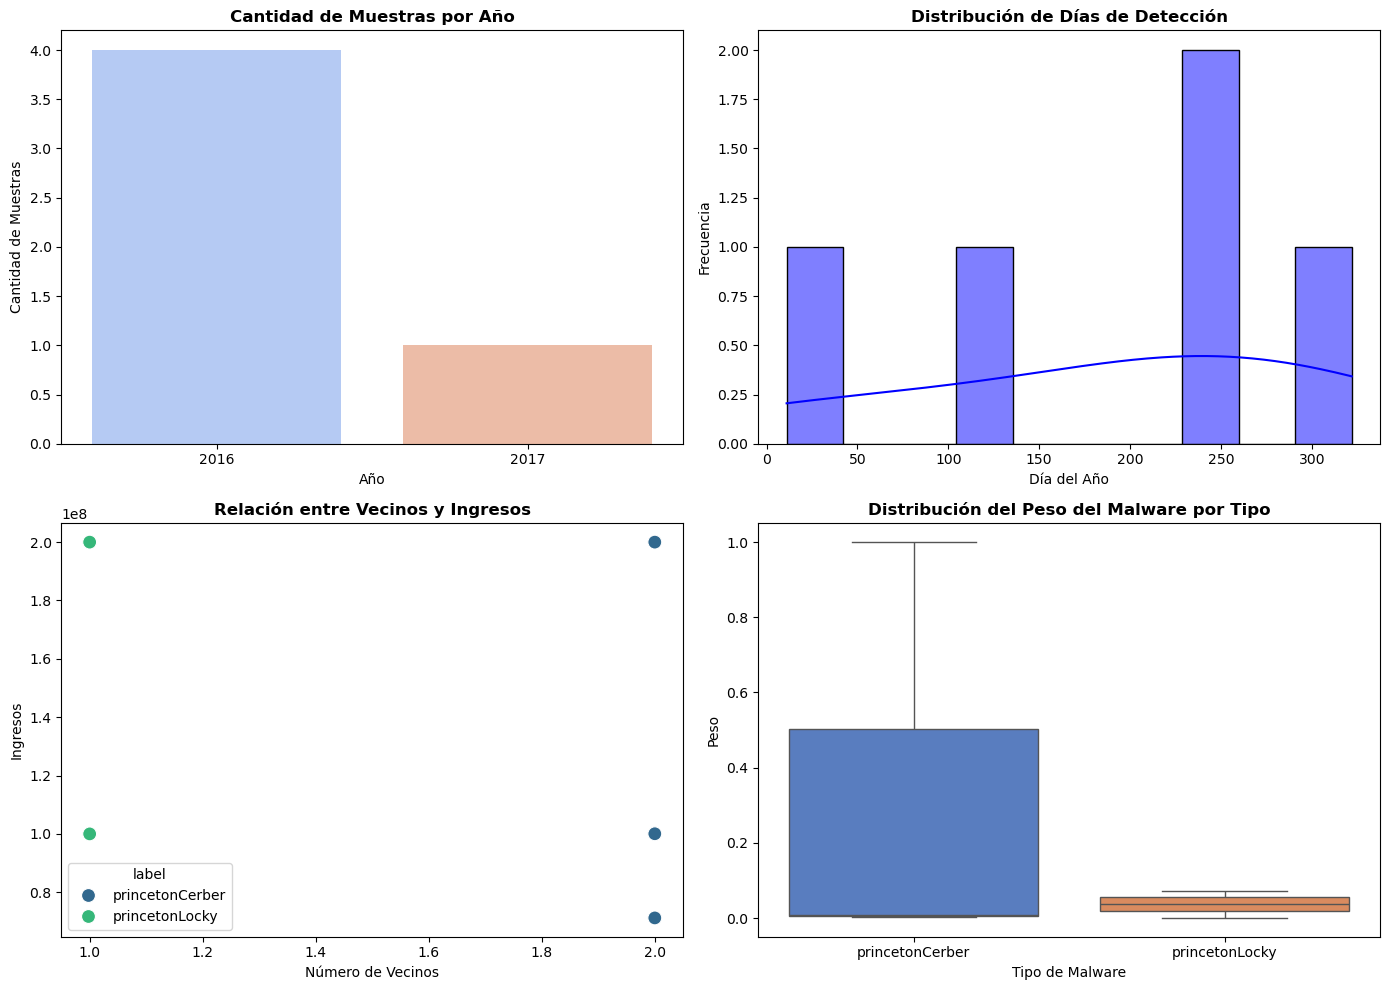

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación de la base de datos
data = {
    "address": [
        "111K8kZAEnJg245r2cM6y9zgJGHZtJPy6",
        "1123pJv8jzeFQaCV4w644pzQJzVWay2zcA",
        "112536im7hy6wtKbpH1qYDWtTyMRAcA2p7",
        "1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7",
        "1129TSjKtx65E35GiUo4AYVeyo48twbrGX",
    ],
    "year": [2017, 2016, 2016, 2016, 2016],
    "day": [11, 132, 246, 322, 238],
    "length": [18, 44, 0, 72, 144],
    "weight": [0.008333, 0.000244, 1.000000, 0.003906, 0.072848],
    "count": [1, 1, 1, 1, 456],
    "looped": [0, 0, 0, 0, 0],
    "neighbors": [2, 1, 2, 2, 1],
    "income": [100050000.0, 100000000.0, 200000000.0, 71200000.0, 200000000.0],
    "label": ["princetonCerber", "princetonLocky", "princetonCerber", "princetonCerber", "princetonLocky"],
}

df = pd.DataFrame(data)

# Configurar tamaño de la figura
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 📌 1. Gráfico de barras: Cantidad de muestras por año
sns.countplot(x="year", data=df, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Cantidad de Muestras por Año", fontsize=12, fontweight="bold")
axes[0, 0].set_xlabel("Año")
axes[0, 0].set_ylabel("Cantidad de Muestras")

# 📌 2. Gráfico de distribución: Días en los que se detectaron los eventos
sns.histplot(df["day"], bins=10, kde=True, ax=axes[0, 1], color="blue")
axes[0, 1].set_title("Distribución de Días de Detección", fontsize=12, fontweight="bold")
axes[0, 1].set_xlabel("Día del Año")
axes[0, 1].set_ylabel("Frecuencia")

# 📌 3. Gráfico de dispersión: Relación entre la cantidad de vecinos y los ingresos
sns.scatterplot(x="neighbors", y="income", hue="label", data=df, ax=axes[1, 0], palette="viridis", s=100)
axes[1, 0].set_title("Relación entre Vecinos y Ingresos", fontsize=12, fontweight="bold")
axes[1, 0].set_xlabel("Número de Vecinos")
axes[1, 0].set_ylabel("Ingresos")

# 📌 4. Boxplot: Distribución del peso del malware por etiqueta
sns.boxplot(x="label", y="weight", data=df, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("Distribución del Peso del Malware por Tipo", fontsize=12, fontweight="bold")
axes[1, 1].set_xlabel("Tipo de Malware")
axes[1, 1].set_ylabel("Peso")

# Ajustar diseño
plt.tight_layout()
plt.show()
